Import libraries

In [23]:
import numpy
import librosa
import librosa.display
import matplotlib.pyplot as plotlib

Import the audio file avm.wav, get its instantaneous amplitudes and sample rate

In [24]:
fileName = 'avm.wav'
instAmps, sr = librosa.load(fileName, mono=True, sr=None)
print(instAmps, sr)

[ 1.5258789e-04  6.7138672e-04  4.5776367e-04 ... -5.7983398e-04
 -2.4414062e-04  9.1552734e-05] 44100


Get the audio file's frequency-domain info

In [25]:
magsAndPhases = librosa.stft(instAmps, n_fft=2048, hop_length=32, win_length=1024)
print(magsAndPhases)

[[-0.04113485+0.0000000e+00j -0.0409535 +0.0000000e+00j
  -0.0404872 +0.0000000e+00j ...  0.00174107+0.0000000e+00j
   0.00026571+0.0000000e+00j -0.00063366+0.0000000e+00j]
 [ 0.04230924+1.0028870e-18j  0.04170424+4.0674713e-03j
   0.03995947+7.6693399e-03j ...  0.0008787 -5.6799054e-03j
   0.00227948-3.7845573e-03j  0.00308826-1.6883542e-03j]
 [-0.04585319+5.4210109e-19j -0.04410607-9.7131068e-03j
  -0.03904156-1.8137995e-02j ... -0.00610704+8.0785528e-03j
  -0.00725295+5.2450374e-03j -0.00783925+2.3126148e-03j]
 ...
 [ 0.00069717-1.8431437e-18j  0.00061433-7.3073956e-04j
   0.00043838-1.4360881e-03j ...  0.00350251+5.3708511e-03j
   0.00470822+3.6654803e-03j  0.00543831+1.6686305e-03j]
 [ 0.00120717+9.4867690e-19j  0.0013094 +6.9273310e-04j
   0.00161125+1.3488841e-03j ... -0.00064959-2.7893421e-03j
  -0.00133898-1.8597038e-03j -0.00173379-8.1728428e-04j]
 [-0.00236615+0.0000000e+00j -0.00242749+0.0000000e+00j
  -0.00267768+0.0000000e+00j ... -0.00070465+0.0000000e+00j
  -0.00012433+

Throw out the phase info and convert the amplitude info to dB

In [26]:
mags = numpy.abs(magsAndPhases)
magsDB = librosa.amplitude_to_db(mags, ref=numpy.max)
print(mags, magsDB)

[[0.04113485 0.0409535  0.0404872  ... 0.00174107 0.00026571 0.00063366]
 [0.04230924 0.04190212 0.04068879 ... 0.00574747 0.00441802 0.00351964]
 [0.04585319 0.04516293 0.04304916 ... 0.01012714 0.00895074 0.00817325]
 ...
 [0.00069717 0.00095466 0.00150151 ... 0.00641199 0.00596684 0.00568855]
 [0.00120717 0.00148135 0.00210134 ... 0.00286398 0.00229158 0.00191676]
 [0.00236615 0.00242749 0.00267768 ... 0.00070465 0.00012433 0.00020025]] [[-65.91856  -65.95694  -66.0564   ... -80.       -80.       -80.      ]
 [-65.67405  -65.75803  -66.01326  ... -80.       -80.       -80.      ]
 [-64.975365 -65.10712  -65.52346  ... -78.09302  -79.16558  -79.954865]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


Plot log spectrogram

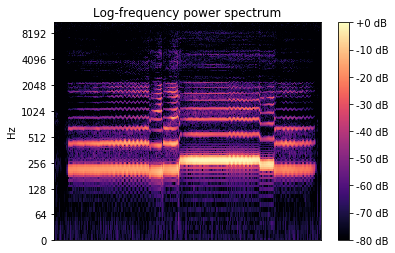

In [27]:
plotlib.title('Log-frequency power spectrum')
librosa.display.specshow(magsDB, y_axis='log')
plotlib.colorbar(format='%+2.0f dB')

Get audio file's frequency-domain info in mel form

In [28]:
melInfo = librosa.feature.melspectrogram(y=instAmps, sr=sr, n_mels=128)
print(melInfo)

[[4.35016269e-05 2.66649197e-05 6.61727725e-05 ... 3.33224545e-05
  2.29875027e-05 1.43256849e-05]
 [1.43442915e-04 1.85987410e-04 2.09117405e-04 ... 9.03221764e-05
  9.94878163e-05 8.26626245e-05]
 [2.40336498e-04 1.94075553e-04 7.60083927e-05 ... 1.65934929e-05
  1.43882673e-04 1.00009471e-04]
 ...
 [3.29558575e-06 3.17784214e-06 4.42223120e-06 ... 6.39260045e-06
  5.62557704e-06 4.47019510e-06]
 [4.42980357e-06 4.39033065e-06 4.18428014e-06 ... 8.50035748e-06
  5.66395940e-06 4.86580661e-06]
 [3.89381290e-06 4.65454746e-06 6.64258524e-06 ... 7.18254827e-06
  7.40975981e-06 5.03830028e-06]]


Convert mel info to dB

In [29]:
melDB = librosa.power_to_db(melInfo, ref=numpy.max)
print(melDB)

[[-73.13167643 -75.25732862 -71.30993811 ... -74.28936158 -75.9018135
  -77.95557749]
 [-67.94994041 -66.82189595 -66.31282961 ... -69.95878749 -69.53903244
  -70.34363953]
 [-65.70853414 -66.6370231  -70.70811593 ... -77.31735329 -67.93664645
  -69.51632013]
 ...
 [-80.         -80.         -80.         ... -80.         -80.
  -80.        ]
 [-80.         -80.         -80.         ... -80.         -80.
  -80.        ]
 [-80.         -80.         -80.         ... -80.         -80.
  -80.        ]]


Plot mel spectrogram

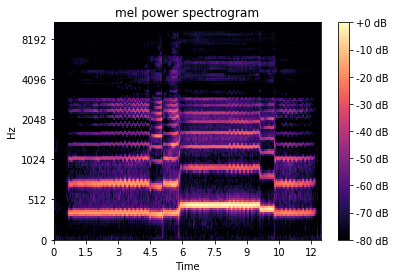

In [30]:
plotlib.title('Mel power spectrogram')
librosa.display.specshow(melDB, sr=sr, x_axis='time', y_axis='mel')
plotlib.colorbar(format='%+2.0f dB')

Separate the time-domain info into harmonic and percussive elements

In [31]:
instAmpsHarm, instAmpsPerc = librosa.effects.hpss(instAmps)
print(instAmpsHarm, instAmpsPerc)

[8.8195113e-05 3.9372328e-04 2.6167880e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] [6.4392792e-05 2.7766349e-04 1.9608495e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]


Create a chromagram from the harmonic element

In [32]:
chroma = librosa.feature.chroma_stft(y=instAmpsHarm, sr=sr, n_chroma=12)
print(chroma)

[[0.35433405 1.         1.         ... 0.85304457 0.83950665 0.8246112 ]
 [0.21129628 0.45811542 0.47040257 ... 0.88506075 0.95668203 1.        ]
 [0.11406927 0.13961109 0.12965062 ... 1.         0.86468105 0.95493052]
 ...
 [1.         0.70632965 0.1863457  ... 0.76620774 1.         0.94555173]
 [0.64878753 0.75757285 0.32920003 ... 0.76337013 0.85751429 0.81833055]
 [0.33007693 0.7550388  0.67755974 ... 0.77316712 0.77713276 0.7141383 ]]


Plot yr chromagram

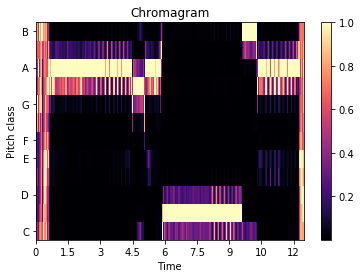

In [37]:
plotlib.title('Chromagram')
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
plotlib.colorbar()